In [1]:
import pandas as pd
credit = pd.read_csv('credit_final.csv')
credit

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,2,2,3,...,4,1,21,2,1,1,2,2,1,1
996,0,1,24,2,4,2303,1,4,4,3,...,1,1,45,2,2,1,3,1,1,1
997,0,3,21,3,4,12680,4,4,4,3,...,4,4,30,2,3,1,4,1,2,1
998,0,2,12,2,3,6468,4,1,2,3,...,1,4,52,2,2,1,4,1,2,1


In [2]:
feature_columns = list(credit.columns.difference(['credit.rating']))
x = credit[feature_columns]
y = credit['credit.rating']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y,test_size=0.3, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(700, 20) (300, 20) (700,) (300,)


In [3]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pred = clf.predict(x_test)
test_cm = confusion_matrix(y_test,pred)
test_acc = accuracy_score(y_test,pred)
test_prc = precision_score(y_test,pred)
test_rc = recall_score(y_test,pred)
test_f1 = f1_score(y_test,pred)

print(test_cm,'\n')
print('정확도\t{}'.format(round(test_acc*100,2)))
print('정밀도\t{}'.format(round(test_prc*100,2)))
print('재현율\t{}'.format(round(test_rc*100,2)))


[[ 28  62]
 [ 27 183]] 

정확도	70.33
정밀도	74.69
재현율	87.14


In [5]:
from sklearn.metrics import classification_report
report = classification_report(y_test,pred)
print(report)

              precision    recall  f1-score   support

           0       0.51      0.31      0.39        90
           1       0.75      0.87      0.80       210

    accuracy                           0.70       300
   macro avg       0.63      0.59      0.60       300
weighted avg       0.68      0.70      0.68       300



C:\Users\suhye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


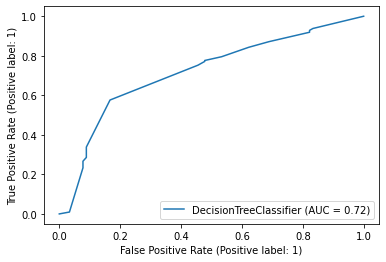

roc_auc_score : 0.717857142857143


In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve, roc_auc_score

plot_roc_curve(clf,x_test,y_test)
plt.show()

R_A_score = roc_auc_score(y_test,clf.predict_proba(x_test)[:,1])
print('roc_auc_score :',R_A_score)

In [7]:
#변수 중요도 확인
importance = clf.feature_importances_
column_nm = pd.DataFrame(x.columns)
feature_importances = pd.concat([column_nm,pd.DataFrame(importance)],
                                axis=1)
feature_importances.columns = ['feature_nm','importances']
print(feature_importances)

                        feature_nm  importances
0                  account.balance     0.263282
1                              age     0.114826
2                   apartment.type     0.033455
3                     bank.credits     0.000000
4                    credit.amount     0.095584
5           credit.duration.months     0.187908
6                   credit.purpose     0.059083
7                   current.assets     0.000000
8                       dependents     0.000000
9              employment.duration     0.000000
10                  foreign.worker     0.000000
11                       guarantor     0.000000
12                installment.rate     0.000000
13                  marital.status     0.013993
14                      occupation     0.000000
15                   other.credits     0.034003
16  previous.credit.payment.status     0.123825
17              residence.duration     0.020960
18                         savings     0.053080
19                       telephone     0

In [8]:
import graphviz

In [12]:
import os 
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.40/bin/'

In [13]:
import numpy as np
feature_names = feature_columns
target_names = np.array(['0','1'])


import pydot 
import pydotplus
import graphviz
from sklearn.tree import export_graphviz

dt_dot_data = export_graphviz(clf, feature_names = feature_names,
                              class_names = target_names,
                              filled=True,
                              rounded = True,
                              special_characters=True)

dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

from IPython.display import Image
Image(dt_graph.create_png())

InvocationException: GraphViz's executables not found

In [ ]:
import os 
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'